<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

# NYC Trees Dataset (2015): A Brief Summary

The 2015 NYC Tree Census, also known as "TreesCount! 2015", is a comprehensive inventory of street trees across all five boroughs of New York City. This citizen science initiative was the third decennial tree census conducted by NYC Parks & Recreation in partnership with volunteers and staff.

## Dataset Highlights

- **Size**: Contains records of approximately 680,000 street trees
- **Geographic Coverage**: All five NYC boroughs (Manhattan, Brooklyn, Queens, Bronx, Staten Island)
- **Collection Period**: 2015-2016

## Key Variables

- **Tree Species**: Over 130 species identified with scientific and common names
- **Tree Measurements**: Diameter at breast height (DBH), indicating tree size and age
- **Tree Health**: Assessments categorized as "Good", "Fair", "Poor", or "Dead"
- **Location Data**: Precise geospatial coordinates, street address, and borough information
- **Site Characteristics**: Presence of guards, stewardship signs, tree pits, and sidewalk damage

## Research Applications

This dataset enables analysis of urban forestry distribution, biodiversity patterns, environmental equity, and the relationship between tree health and various urban factors. It serves as a valuable resource for urban planners, environmental scientists, and community organizations working on green infrastructure initiatives.

## Accessing the Data

We've downloaded the data from the [Tree Census website](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/data_preview) as a CSV file to work with locally.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# The magic commands above do the following:
# 1. %load_ext autoreload - Loads the autoreload extension
# 2. %autoreload 2 - Automatically reloads all modules before executing code
# 3. %matplotlib inline - Displays matplotlib plots inline in the notebook

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(Path("2015_Street_Tree_Census_-_Tree_Data_20250308.csv"))

df.describe(include="all")

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788,683788.000000,683788.000000,683788,683788,652172,652169,652169,...,6.837880e+05,683788,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
unique,NaN,NaN,483,NaN,NaN,2,3,3,132,132,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10/27/2015,NaN,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,NaN,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6852,NaN,NaN,656896,652173,528850,87014,87014,...,NaN,683788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365205.011085,313793.096236,NaN,11.279787,0.432463,NaN,NaN,NaN,NaN,NaN,...,3.404914e+06,NaN,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,NaN,8.723042,3.290241,NaN,NaN,NaN,NaN,NaN,...,1.175863e+06,NaN,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.000201e+06,NaN,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,3.011700e+06,NaN,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,NaN,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.008100e+06,NaN,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,NaN,16.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.103202e+06,NaN,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09


In [3]:
df.shape

(683788, 45)

In [4]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# Some features are not populated for dead or stump trees

df.isna().sum()

tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health               31616
spc_latin            31619
spc_common           31619
steward             519438
guards              603922
sidewalk             31616
user_type                0
problems            457944
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state                    0
l

In [7]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [8]:
cols_of_interest = [
    "tree_id",
    "block_id",
    "tree_dbh",  # Tree diameter
    "stump_diam",  # Stump diameter
    "status",  # Alive, stump, dead
    "health",  # Good, fair, poor
    "spc_common",  # Species
    "problems",  # Aggregate of all problems
    "address",
    "latitude",
    "longitude",
    "borough",
]

df = df[cols_of_interest]

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

This dataset is actually quite well maintained and requires little wrangling. As described above, some columns are intentionally left empty when not applicable (for stumps and dead trees primarily). We did not find any duplicate rows either. We will instead focus primarily on the visualizations.

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.



Text(0.12, 0.05, 'Produced with matplotlib')

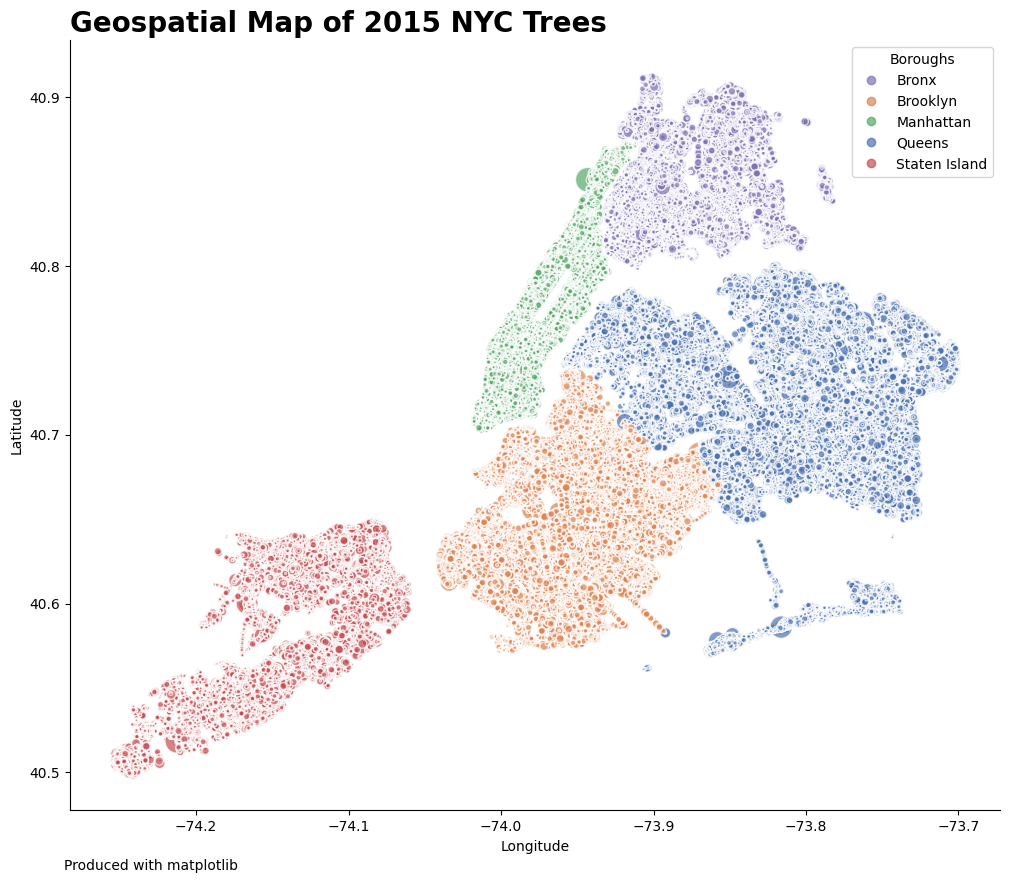

In [ ]:
# Plot the longitude and latitude to represent the trees in geospatial coordinates
# Use color and marker size to show boroughs and tree size respectively

from matplotlib.colors import ListedColormap

# Define custom colors
colors = {
    "Queens": "#4C72B0",
    "Brooklyn": "#DD8452",
    "Manhattan": "#55A868",
    "Staten Island": "#C44E52",
    "Bronx": "#8172B3",
}

# Get unique boroughs and make sure they're in a consistent order
unique_boroughs = sorted(df["borough"].unique())

# Create color list in the same order as unique_boroughs
color_list = [colors[borough] for borough in unique_boroughs]

# Create a custom colormap
custom_cmap = ListedColormap(color_list)

plt.figure(figsize=(12, 10))

# Create categorical codes for boroughs (0, 1, 2, etc.)
borough_codes = df["borough"].map({b: i for i, b in enumerate(unique_boroughs)})

# Plot using the numerical codes and custom colormap
scatter = plt.scatter(
    df["longitude"],
    y=df["latitude"],
    alpha=0.7,
    marker="o",
    edgecolors="white",
    s=df["tree_dbh"],
    c=borough_codes,
    cmap=custom_cmap,
)

# Create legend with the correct labels
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=unique_boroughs,
    loc="best",
    title="Boroughs",
)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Map of 2015 NYC Trees", loc="left", weight="bold", size="20")
plt.figtext(0.12, 0.05, "Produced with matplotlib", horizontalalignment="left")

# TODO add legend

In [ ]:
df_species = df.groupby(["spc_common"], as_index=False).size()
df_species_top = df_species.sort_values(by="size", ascending=False)
df_species_top = df_species_top.iloc[:10, :]
df_species_top = df_species_top.sort_values(by="size", ascending=True)
df_species_top["spc_common"] = df_species_top.spc_common.str.title()
df_species_top["prop"] = df_species_top["size"] / df_species_top["size"].sum() * 100

Text(0.12, 0.01, 'Produced with matplotlib')

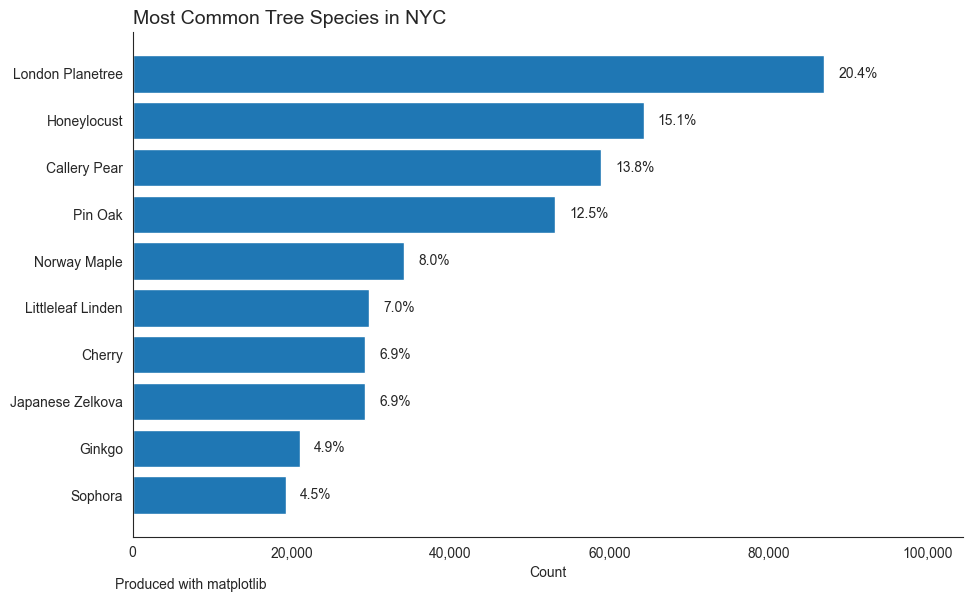

In [ ]:
# Bar plot to demonstrate the top most common species of trees
# by count / proportion and species name

import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

# Calculate total for percentages
total = df_species_top["size"].sum()

# Create horizontal bar chart
bars = plt.barh(y=df_species_top["spc_common"], width=df_species_top["size"])

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    percentage = (width / total) * 100
    label_position = width + (
        max(df_species_top["size"]) * 0.02
    )  # Small offset from bar end
    plt.text(
        label_position,
        bar.get_y() + bar.get_height() / 2,
        f"{percentage:.1f}%",  # Format to 1 decimal place
        va="center",
    )

# Format the plot
plt.title("Most Common Tree Species in NYC", loc="left", fontsize=14)
plt.xlabel("Count")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
# Adjust layout to make room for labels
plt.tight_layout()
plt.margins(x=0.2)  # Add extra space on the right for labels
plt.figtext(0.12, 0.01, "Produced with matplotlib", horizontalalignment="left")


### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


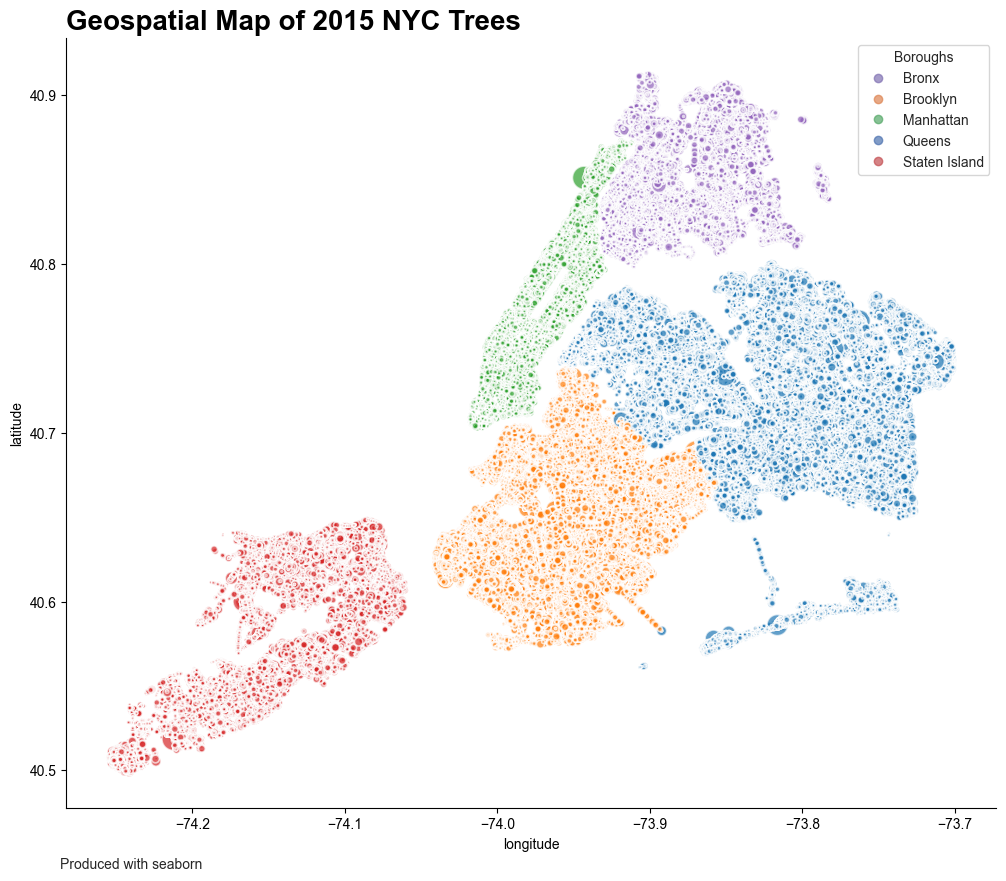

In [ ]:
# Plot the longitude and latitude to represent the trees in geospatial coordinates
# Use color and marker size to show boroughs and tree size respectively

plt.subplots(figsize=(12, 10))
sns.set_style("white")
sns.scatterplot(
    df,
    x="longitude",
    y="latitude",
    hue="borough",
    size="tree_dbh",
    sizes=(0, 400),  # Set limit on marker size
    alpha=0.7,
    edgecolors="white",
    linewidth=1.2,
)

plt.title("Geospatial Map of 2015 NYC Trees", loc="left", weight="bold", size="20")
# plt.xticks([40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0])
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=unique_boroughs,
    loc="best",
    title="Boroughs",
)
plt.figtext(0.12, 0.05, "Produced with seaborn", horizontalalignment="left")
sns.despine()

Text(0.12, 0.01, 'Produced with seaborn')

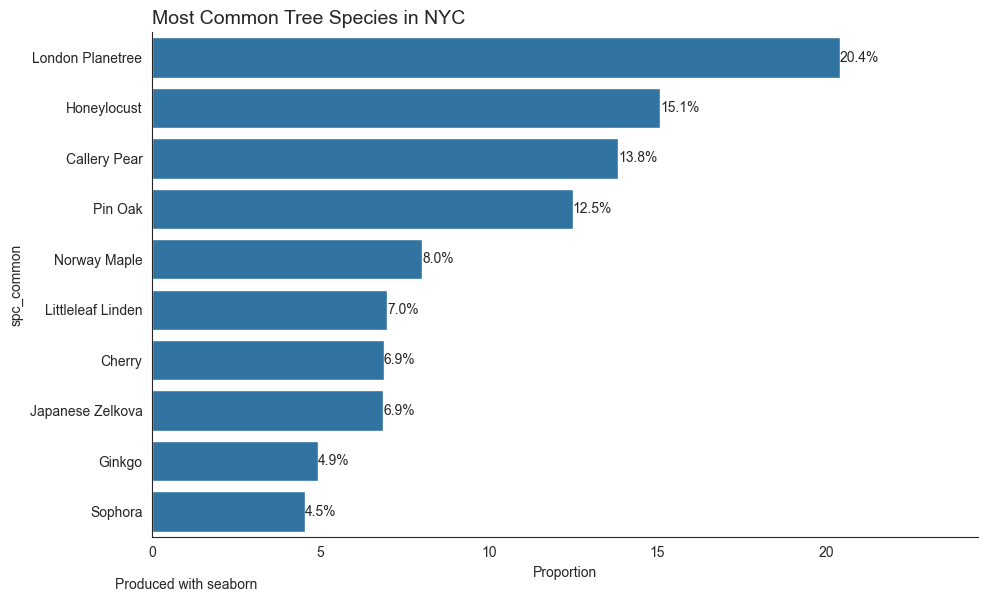

In [ ]:
# Bar plot to demonstrate the top most common species of trees
# by count / proportion and species name


plt.figure(figsize=(10, 6))

ax = sns.barplot(
    df_species_top.sort_values("prop", ascending=False),
    y="spc_common",
    x="prop",
)
ax.bar_label((ax.containers[0]), fontsize=10, fmt="%.1f%%")
sns.despine()
plt.title("Most Common Tree Species in NYC", loc="left", fontsize=14)
plt.xlabel("Proportion")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
# Adjust layout to make room for labels
plt.tight_layout()
plt.margins(x=0.2)  # Add extra space on the right for labels
plt.figtext(0.12, 0.01, "Produced with seaborn", horizontalalignment="left")

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

The main difference between seaborn and matplotlib is the initial figure and axes creation. Seaborn offers convenient, higher level API to start building plots, but often I find I need to drop down to the matplotlib API in order to truly fine tune the plot.

At the end of the day, Seaborn is really just using matplotlib under the hood, but I find this to be an advantage and not a detrimant. Matplotlib is powerful but has notoriously confusing syntax, so letting Seaborn do the bulk of the work up front, *without losing access to matplotlib*, is a good workflow.

One other interesting aspect of Seaborn is the graph objects implementation. Inspired by R's ggplot package (a gold standard in visualization libraries in my opinion), it uses a convenient object-oriented syntax that follows the grammer of graphics nicely. This implementation is still under developed, but I look forward to using it more in the future.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

Urban forest planning is a very important aspect of maintain good health of the land and inhabitants of a city. Some species are well adapated to urban growing conditions, which as evidenced in the data, makes trees like the London Planetree and Honey Locust.

Interestingly, we can see that this dataset actually excludes Manhattan's Central Park. My guess is that this is treated as separate and distinct from the trees throughout the city itself.

My favorite part about this dataset is that using the geospatial representation, we can actually infer the city's avenues and streets, as well as the more densly urban areas. Using the data, you can actually go "visit" some of the trees in Google Maps Street View!
